In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 5.1.5 Hogg, Craig, McKean

In [2]:
means = []
medians = []

for n in range(10,2001, 10):
    X = np.random.normal(size = n)
    
    means += [np.mean(X)]
    medians += [np.median(X)]

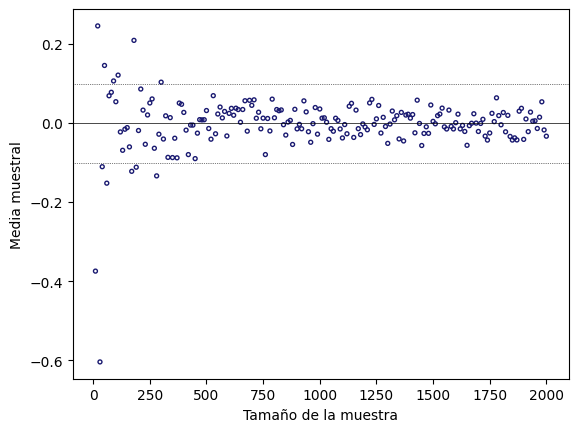

In [3]:
plt.scatter(range(10,2001,10), means, s = 8, facecolors='none', edgecolors='midnightblue')

plt.axhline(y=0, color = 'k', xmin=0, xmax=2000, linewidth = 0.5) 
plt.axhline(y=-0.1, color = 'k', xmin=0, xmax=2000, linewidth = 0.5, ls = ':')
plt.axhline(y=0.1, color = 'k', xmin=0, xmax=2000, linewidth = 0.5, ls=':') 

plt.xlabel('Tamaño de la muestra')
plt.ylabel('Media muestral')
plt.savefig('mean.pdf')

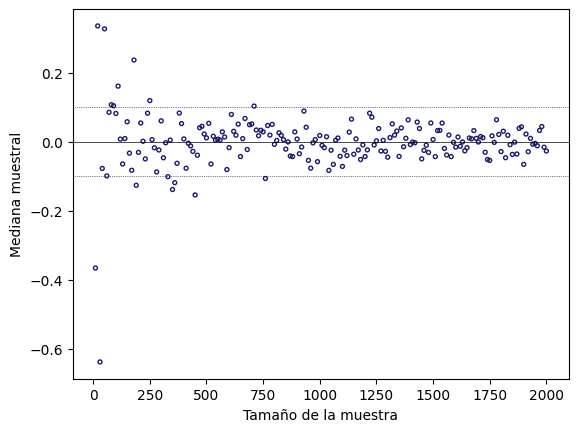

In [4]:
plt.scatter(range(10,2001,10), medians, s=8, facecolors='none', edgecolors='midnightblue')

plt.axhline(y=0, color = 'k', xmin=0, xmax=2000, linewidth = 0.5) 
plt.axhline(y=-0.1, color = 'k', xmin=0, xmax=2000, linewidth = 0.5, ls = ':')
plt.axhline(y=0.1, color = 'k', xmin=0, xmax=2000, linewidth = 0.5, ls=':') 

plt.xlabel('Tamaño de la muestra')
plt.ylabel('Mediana muestral')
plt.savefig('median.pdf')

### 5.3 Knight

In [5]:
X = np.array([0.7, 11.3, 2.1, 30.7, 4.6, 20.2, 0.3, 0.9, 0.7, 2.3, 1.1, 1.9, 0.5, 0.8, 1.2, 15.2, 0.2, 0.7, 0.4, 2.3])
Y = np.array([3.8, 4.6 , 2.1 , 5.6 , 10.3, 2.8, 1.9, 1.4, 0.4, 0.9, 2.8, 3.2 , 8.5 , 14.5 , 14.4, 8.8, 7.6 , 1.3 , 2.2 , 4.0])
R = X/Y

In [6]:
# Defining Function
def f(x):
    s = np.sum((R/(1 + x*R)))
    return 20/x - 2*s

In [7]:
# Defining derivative of function
def g(x):
    s = 0
    for r in R:
        t = r/(1+x*r)
        s += t**2
    
    return -20/x**2 + 2*s

In [8]:
f(20)

-0.6678304258287111

In [9]:
f(10)

-1.0033859241532688

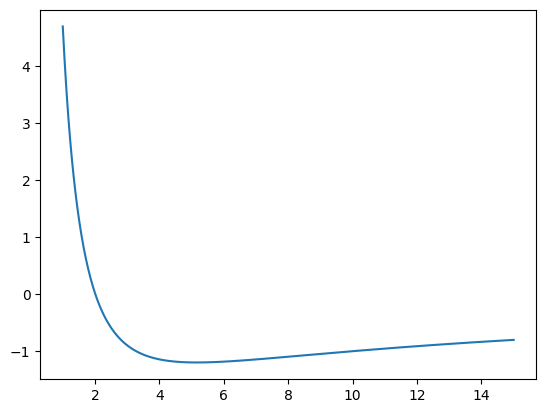

In [10]:
x = np.linspace(1,15,1000)

plt.plot(x, [f(val) for val in x])

plt.show()

In [11]:
# Implementing Newton Raphson Method
def newtonRaphson(x0,e,N):
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    step = 1
    flag = 1
    condition = True
    while condition:
        if g(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/g(x0)
        print('Iteration-%d, x1 = %0.6f and f(x1) = %0.6f' % (step, x1, f(x1)))
        x0 = x1
        step = step + 1
        
        if step > N:
            flag = 0
            break
        
        condition = abs(f(x1)) > e
    
    if flag==1:
        print('\nRequired root is: %0.8f' % x1)
    else:
        print('\nNot Convergent.')


# Input Section
x0 = 2
e = 1e-5
N = 1000

# Converting x0 and e to float
x0 = float(x0)
e = float(e)

# Converting N to integer
N = int(N)


#Note: You can combine above three section like this
# x0 = float(input('Enter Guess: '))
# e = float(input('Tolerable Error: '))
# N = int(input('Maximum Step: '))

# Starting Newton Raphson Method
newtonRaphson(x0,e,N)



*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration-1, x1 = 2.010092 and f(x1) = 0.000130
Iteration-2, x1 = 2.010169 and f(x1) = 0.000000

Required root is: 2.01016936


### Tarea 4

In [2]:
def inverse_cdfA (y, theta):
    return theta*np.sqrt(y)

def inverse_cdfB (y, theta):
    return theta * np.sqrt(2 * (np.log(1/(1-y))))

In [3]:
sample_sizes = [50, 200, 500, 1000, 2000]
est_1A = []   # Aquí almacenaré los valores de los estimadores para cada muestra; modelo A
est_2A = []

est_1B = []   # Modelo B
est_2B = []

for n in sample_sizes:
    lst1 = []   # Aquí almacenaré los valores de los estimadores para cada muestra
    lst2 = []
    lst3 = []
    lst4 = []
    for k in range(1,501):
        U = np.random.rand(n)     # Genera una muestra uniforme de tamaño n
        X = inverse_cdfA(U, 2.3)  # Transforma la muestra generada con su respectivo modelo
        Y = inverse_cdfB(U, 2.3)
        
        lst1 += [np.sqrt(2)*np.median(X)]    # Calcula el valor de los estimadores para la muestra generada
        lst2 += [np.max(X)]
        lst3 += [np.sqrt(2/np.pi)*np.mean(Y)]
        lst4 += [np.sqrt(0.5 * np.mean(np.square(Y)))]
    
    est_1A += [lst1]  # Adjunta listas a la matriz de valores de los estimadores
    est_2A += [lst2]
    est_1B += [lst3]
    est_2B += [lst4]

est_1A = np.array(est_1A)  # Convierte en array de Numpy para facilitar manipulación
est_2A = np.array(est_2A)
est_1B = np.array(est_1B)
est_2B = np.array(est_2B)

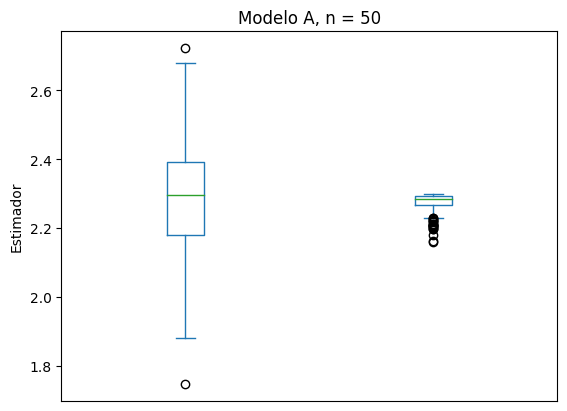

In [5]:
data = pd.DataFrame({"theta_1": est_1A[0,:], "theta_2": est_2A[0,:]})

ax = data[['theta_1', 'theta_2']].plot(kind='box', title= 'Modelo A, n = 50')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.ylabel('Estimador')
plt.show()

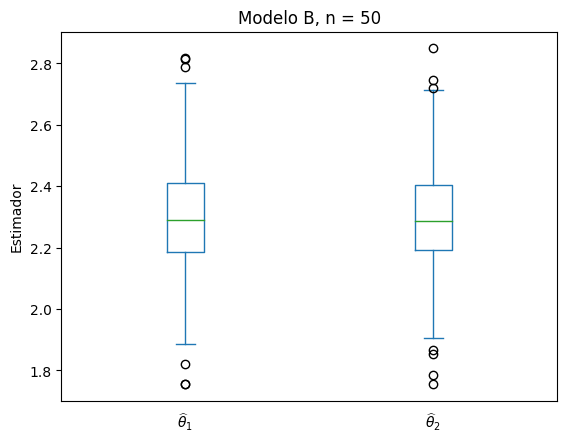

In [6]:
data = pd.DataFrame({"theta_1": est_1B[0,:], "theta_2": est_2B[0,:]})

ax = data.plot(kind='box', title= 'Modelo B, n = 50')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False         # ticks along the top edge are off
)

ax.set_xticklabels([r'$\widehat{\theta}_1$', r'$\widehat{\theta}_2$'])

plt.ylabel('Estimador')
plt.show()

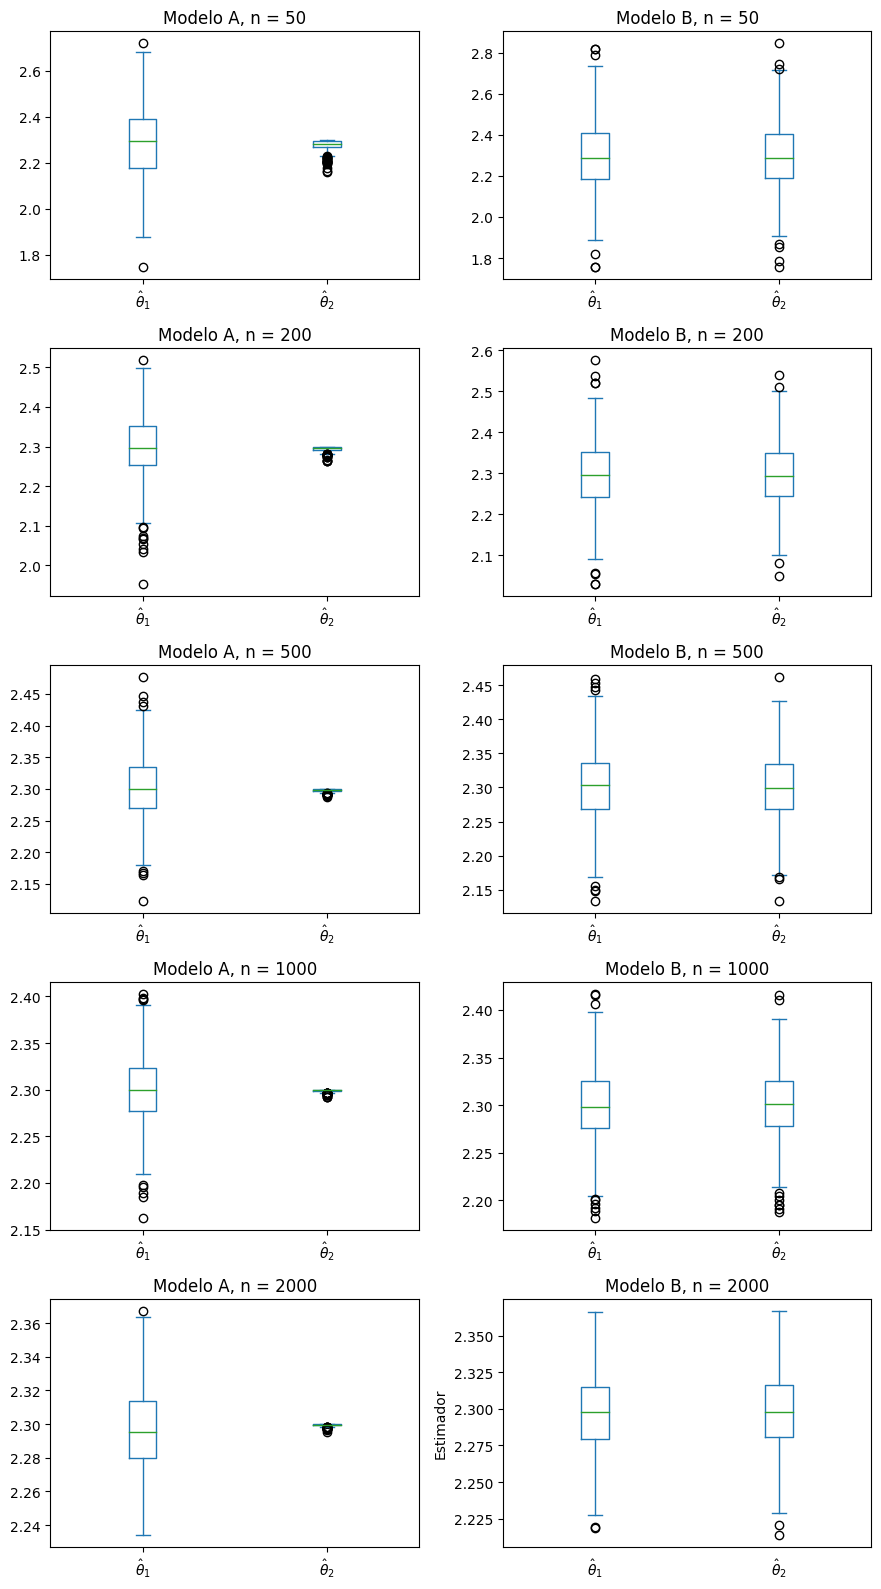

In [7]:
fig, axs = plt.subplots(5, 2)

fig.set_size_inches(9,16)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False          # ticks along the top edge are off
)

ax.set_xticklabels([r'$\hat{\theta}_1$', r'$\hat{\theta}_2$'])

plt.ylabel('Estimador')

for i, n in enumerate(sample_sizes):
    data1 = pd.DataFrame({"theta_1": est_1A[i,:], "theta_2": est_2A[i,:]})
    data2 = pd.DataFrame({"theta_1": est_1B[i,:], "theta_2": est_2B[i,:]})

    data1.plot(kind='box', title='Modelo A, n = {}'.format(n), ax = axs[i,0])
    data2.plot(kind='box', title='Modelo B, n = {}'.format(n), ax = axs[i,1])
    
    axs[i,0].set_xticklabels([r'$\hat{\theta}_1$', r'$\hat{\theta}_2$'])
    axs[i,1].set_xticklabels([r'$\hat{\theta}_1$', r'$\hat{\theta}_2$'])
    
fig.tight_layout()

fig.savefig('Est-T4/boxplots1.pdf')

In [8]:
mse_1A = [np.mean((est_1A[i,:] - 2.3)**2) for i in range(len(sample_sizes))]
mse_2A = [np.mean((est_2A[i,:] - 2.3)**2) for i in range(len(sample_sizes))]

mse_1B = [np.mean((est_1B[i,:] - 2.3)**2) for i in range(len(sample_sizes))]
mse_2B = [np.mean((est_2B[i,:] - 2.3)**2) for i in range(len(sample_sizes))]

eff_A = np.array(mse_2A)/np.array(mse_1A)
eff_B = np.array(mse_2B)/np.array(mse_1B)

In [9]:
Est_1A = []   # Aquí almacenaré los valores de los estimadores para cada muestra; modelo A
Est_2A = []

Est_1B = []   # Modelo B
Est_2B = []

for n in sample_sizes:
    lst1 = []   # Aquí almacenaré los valores de los estimadores para cada muestra
    lst2 = []
    lst3 = []
    lst4 = []
    for k in range(1,501):
        U = np.random.rand(n)     # Genera una muestra uniforme de tamaño n
        X = inverse_cdfA(U, 8)  # Transforma la muestra generada con su respectivo modelo
        Y = inverse_cdfB(U, 8)
        
        lst1 += [np.sqrt(2)*np.median(X)]    # Calcula el valor de los estimadores para la muestra generada
        lst2 += [np.max(X)]
        lst3 += [np.sqrt(2/np.pi)*np.mean(Y)]
        lst4 += [np.sqrt(0.5 * np.mean(np.square(Y)))]
    
    Est_1A += [lst1]  # Adjunta listas a la matriz de valores de los estimadores
    Est_2A += [lst2]
    Est_1B += [lst3]
    Est_2B += [lst4]

Est_1A = np.array(Est_1A)  # Convierte en array de Numpy para facilitar manipulación
Est_2A = np.array(Est_2A)
Est_1B = np.array(Est_1B)
Est_2B = np.array(Est_2B)

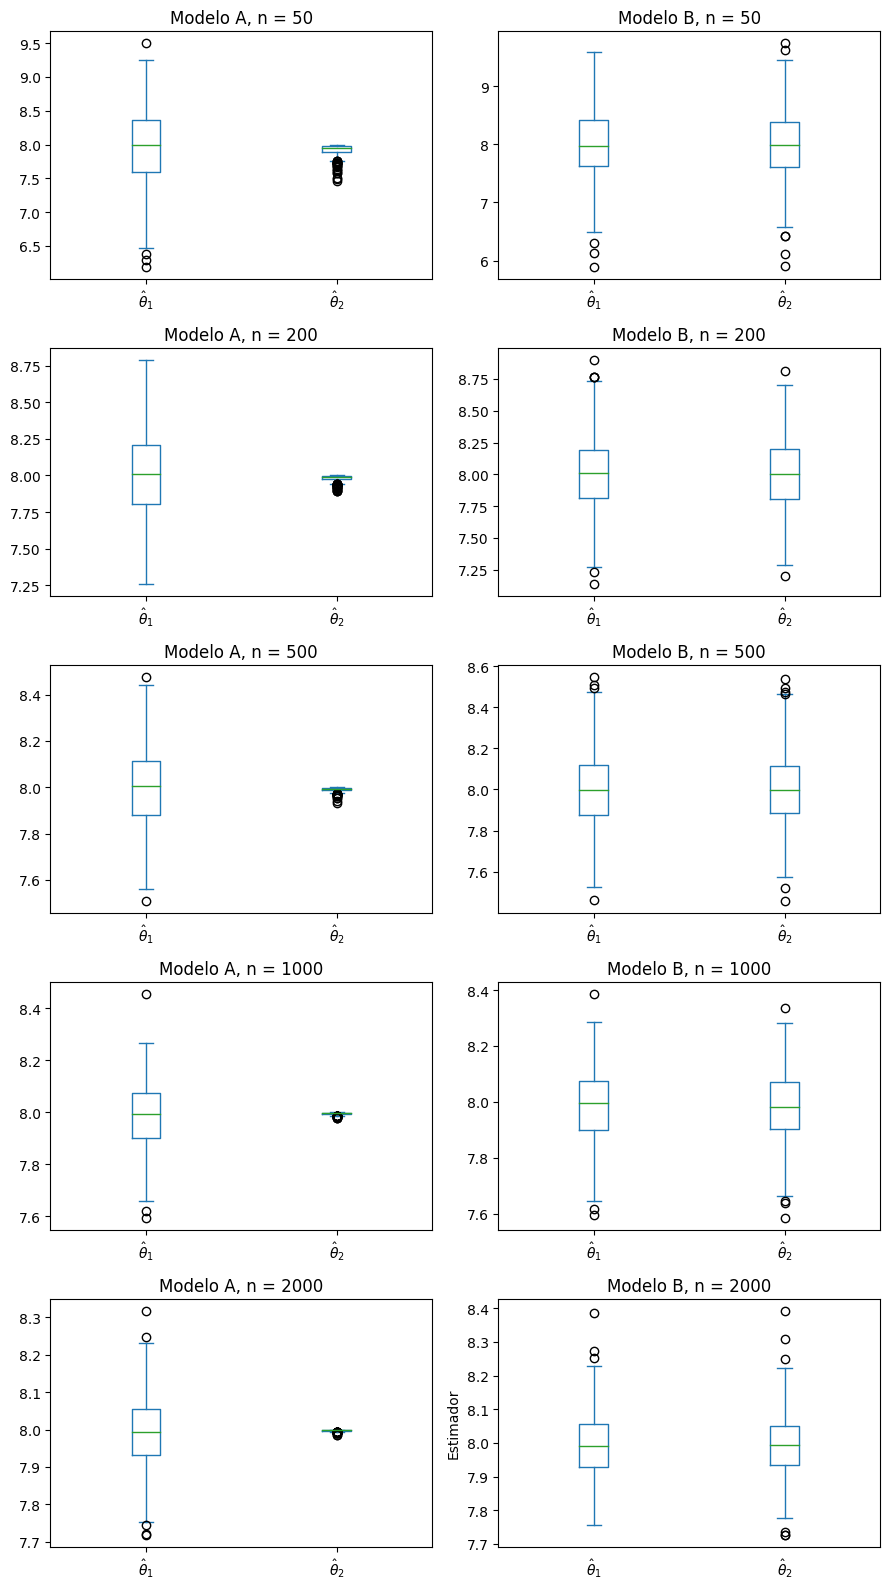

In [10]:
fig, axs = plt.subplots(5, 2)

fig.set_size_inches(9,16)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False          # ticks along the top edge are off
)

ax.set_xticklabels([r'$\hat{\theta}_1$', r'$\hat{\theta}_2$'])

plt.ylabel('Estimador')

for i, n in enumerate(sample_sizes):
    data1 = pd.DataFrame({"theta_1": Est_1A[i,:], "theta_2": Est_2A[i,:]})
    data2 = pd.DataFrame({"theta_1": Est_1B[i,:], "theta_2": Est_2B[i,:]})

    data1.plot(kind='box', title='Modelo A, n = {}'.format(n), ax = axs[i,0])
    data2.plot(kind='box', title='Modelo B, n = {}'.format(n), ax = axs[i,1])
    
    axs[i,0].set_xticklabels([r'$\hat{\theta}_1$', r'$\hat{\theta}_2$'])
    axs[i,1].set_xticklabels([r'$\hat{\theta}_1$', r'$\hat{\theta}_2$'])
    
fig.tight_layout()

fig.savefig('Est-T4/boxplots2.pdf')

In [11]:
Mse_1A = [np.mean((Est_1A[i,:] - 8)**2) for i in range(len(sample_sizes))]
Mse_2A = [np.mean((Est_2A[i,:] - 8)**2) for i in range(len(sample_sizes))]

Mse_1B = [np.mean((Est_1B[i,:] - 8)**2) for i in range(len(sample_sizes))]
Mse_2B = [np.mean((Est_2B[i,:] - 8)**2) for i in range(len(sample_sizes))]

Eff_A = np.array(Mse_2A)/np.array(Mse_1A)
Eff_B = np.array(Mse_2B)/np.array(Mse_1B)

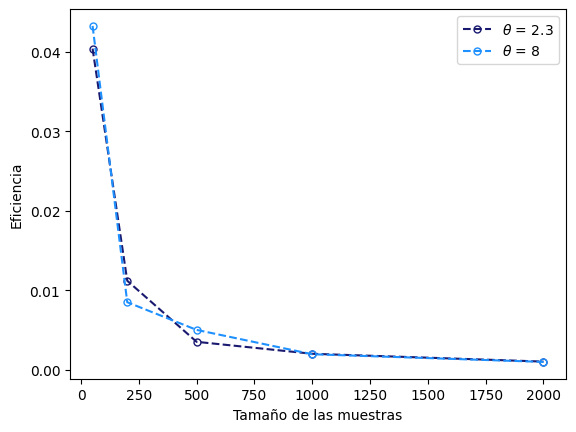

In [12]:
plt.plot(sample_sizes, eff_A, ls='--', color='midnightblue', marker='o', ms=5,
         fillstyle='none', label=r'$\theta$ = 2.3')
plt.plot(sample_sizes, Eff_A, ls='--', color='dodgerblue', marker='o', ms=5,
         fillstyle='none', label=r'$\theta$ = 8')

plt.xlabel('Tamaño de las muestras')
plt.ylabel('Eficiencia')
plt.legend()
plt.savefig('Est-T4/eficienciaA.pdf')

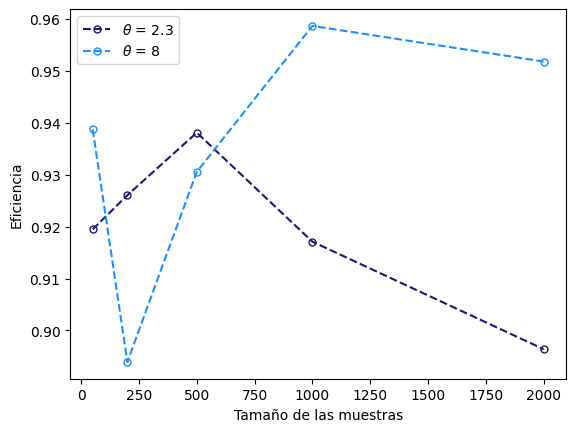

In [13]:
plt.plot(sample_sizes, eff_B, ls='--', color='midnightblue', marker='o', ms=5,
         fillstyle='none', label=r'$\theta$ = 2.3')
plt.plot(sample_sizes, Eff_B, ls='--', color='dodgerblue', marker='o', ms=5,
         fillstyle='none', label=r'$\theta$ = 8')

plt.xlabel('Tamaño de las muestras')
plt.ylabel('Eficiencia')
plt.legend()
plt.savefig('Est-T4/eficienciaB.pdf')